# Linear Regression

Let's return to our running house price-prediction example. Predicting sales price from the features is a regression problem, because sale price varies continuously. What we're trying to find is some optimal function that, given a matrix of feature scores, can produce a set of continuous values that best approximates (for whatever definition of "best" we like) the true house price of our houses.

First we import the required libraries then investigate the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

all_data = pd.read_csv('../data/house_prices.csv', sep=',', index_col=0).reset_index(drop=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
# Select only columns that are numeric
all_data = all_data.select_dtypes(['number'])

# Remove any rows that contain NaN
for ifeature in list(all_data):
    all_data = all_data[pd.notnull(all_data[ifeature])]

all_data.shape

(1121, 37)

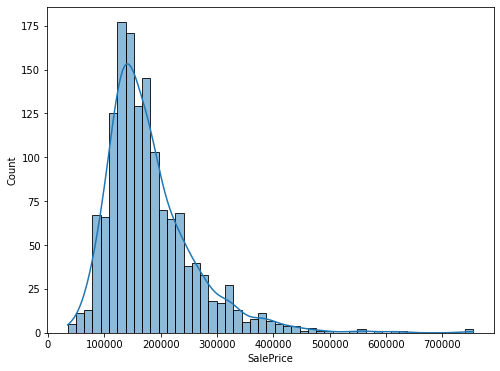

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(all_data['SalePrice'], kde=True)
plt.savefig('/home/greydon/Documents/GitHub/blog/docs/machine_learning/linear_regression_01.png')

## Training a Linear Regression Model

We will need to first split up our data into an **X** array that contains the features to train on, and a **y** array with the target variable, in this case the Sale Price. We start by setting the X and y variables, split into train and test sets using scikit learns **train_test_split** function and initialize the **LinearRegression** estimator:

In [14]:
from sklearn.model_selection import train_test_split

# Set input features and output variable
y = all_data['SalePrice']
X = all_data.drop(['SalePrice'], axis =1)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.30, random_state=101)

# OLS (and many other variants of regression) is housed in the linear_model module
from sklearn.linear_model import LinearRegression

# initialize the model
lr_model = LinearRegression()

The **LinearRegression** estimator, unlike many others, has very few configurable parameters. Above, we initialize it with all of the default values by passing no arguments to the function. Now we're ready to fit some data! We can do that by calling the **.fit()** method. This will be true for every **Estimator** in scikit-learn. We will use our training sub-datasets we created:

In [15]:
# Fit the model
lr_model.fit(X_train, y_train);

In [16]:
# The sklearn convention is to denote fitted parameters with a trailing underscore
print('Model y intercept:',lr_model.intercept_,'\n')
print('Model feature coefficients:',lr_model.coef_,'\n')

Model y intercept: -1348228.3926262031 

Model feature coefficients: [-8.75772924e+01  5.95600326e+01  1.18930737e+00  1.38647884e+04
  4.91899261e+03  4.10628404e+02  1.81486446e+02  1.51819223e+01
  2.69056767e+01 -1.07411164e+00 -3.69107465e-01  2.54624576e+01
  1.84098928e+01  2.14677482e+01  7.35941390e+00  4.72370548e+01
 -8.14206679e+02 -6.09318362e+03 -1.52754837e+03 -1.82409326e+03
 -1.58292462e+04 -2.59304669e+04  5.44696494e+03 -4.36801780e+01
 -4.51893373e+01  4.11495671e+03  2.38219900e+01  4.82163185e+00
  2.38325092e+01  3.04386635e+01  9.87034508e+00  4.14229568e+01
  1.26489368e+02 -2.30107736e+00  2.62862323e+02  1.01150684e+02] 



In [10]:
coeff_df = pd.DataFrame(lr_model.coef_,X.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
MSSubClass,-87.577292
LotFrontage,59.560033
LotArea,1.189307
OverallQual,13864.788358
OverallCond,4918.992610


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Lot Frontage** is associated with an **increase of \$59.56 **.
- Holding all other features fixed, a 1 unit increase in **Lot Area** is associated with an **increase of \$1.18 **.
- Holding all other features fixed, a 1 unit increase in **Overall Condition** is associated with an **increase of \$4918.99 **.

The next step is to use the trained model to predict new house Sale Price on new data. We do this by making use of the **.predict()** method that all **Estimator** classes implement. For example, here are the predicted scores for our **X** test data:

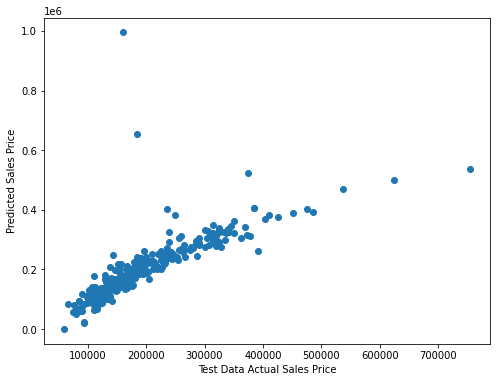

In [18]:
lr_predictions = lr_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test,lr_predictions);
plt.xlabel('Test Data Actual Sales Price');
plt.ylabel('Predicted Sales Price');

plt.savefig('/home/greydon/Documents/GitHub/blog/docs/machine_learning/img/linear_regression_02.png')

We can also plot the residual:

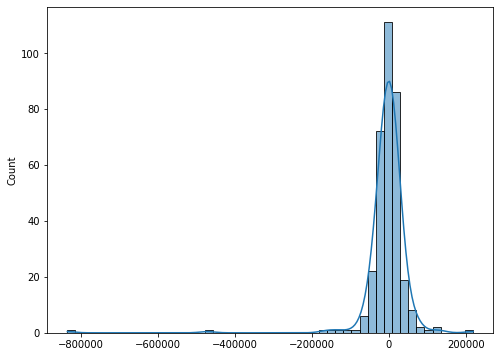

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot((y_test-lr_predictions),bins=50,kde=True);
plt.savefig('/home/greydon/Documents/GitHub/blog/docs/machine_learning/img/linear_regression_03.png')

Just to underscore how little we had to do, here's the whole example again, in three lines:

In [21]:
# Initialize the linear regression estimator
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Generate predictions
lr_predictions = lr_model.predict(X_test)

# Performance metrics

Once we've fit our model, it's natural to want to know how well it performs. In machine learning, the focus of model performance is on prediction; typically, we have some objective quantitative metric we care about, and to the degree that a model can produce better values on that metric, we incline to evaluate it more favorably. This doesn't mean that we have to single-mindedly base our evaluation of model on just one quantity; in practice, many other considerations may come into play (e.g., computational efficiency, interpretability, etc.). The point is mainly that machine learning practitioners—at least in applied settings—tend to care much more than traditional scientists do about what models can actually *do*, and much less about what's going on inside them.

## The coefficient of determination

For the rest of this tutorial, we're going to focus our attention on one particular metric of predictive performance: the coefficient of determination, or $R^2$. $R^2$ quantifies the proportion of variance in the outcome variable (e.g., house price) explained by the fitted model:

R-squared (R2) is the measure used to determine which line minimizes this distance:

<a href="https://www.codecogs.com/eqnedit.php?latex=R^{2}&space;=&space;\frac{Explained&space;variation}{Total&space;variation}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?R^{2}&space;=&space;\frac{Explained&space;variation}{Total&space;variation}" title="R^{2} = \frac{Explained variation}{Total variation}" /></a>

$R^2$ is the most widely used measure of performance in the individual differences literature, and we'll stick with tradition here. But this shouldn't be taken as an indication that there's anything particularly special about $R^2$. In fact, in many applications, it's a pretty bad metric, because it's defined with reference to the relative variation in a particular sample, and completely ignores the absolute deviation of predictions from the true scores (i.e., a model can have an $R^2$ of 1 while generating a predicted score distribution entirely outside the range of the true scores). For our purposes though, $R^2$ is a sensible metric, because for most individual differences variables, absolute scores don't really mean anything anyway—we're almost always interested in how variation across individuals relates to variation in some other measure or construct.

Here are three other common evaluation metrics for machine learning problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

## How well did we do?

Let's see how well the linear regression model we fitted earlier (using the house features as predictors) explains the variance in sales price. We'll make use of scikit-learn's **metrics** module, which contains a large number of predefined performance metrics. As is true of **Estimator** objects, all metrics in scikit-learn follow the same usage pattern: we pass in the true scores and the model's predicted scores, respectively.

In [22]:
# the metrics module contains predefined scoring functions
# for commonly used metrics like r^2, MSE, etc. 
from sklearn import metrics

# scoring functions are called by passing an array of
# true scores and and an array of predicted scores as
# inputs
print('Model score:', metrics.r2_score(y_test, lr_predictions))
print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

Model score: 0.5238801531365112
MAE: 26110.712069211004
MSE: 3851956330.37256
RMSE: 62064.130787215254


Looking at the $R^2$ score we get the amount of variance explained by the model, which means we can explain about 52% of the variance in sales price using 27 features of the home.

For convenience, scikit-learn estimators have a **.score()** method you can use as an alternative to the above. Instead of generating predicted scores and then explicitly feeding them to a metric function like **r2_score**, you can call **.score()** directly on the estimator after the **fit()** step, and the prediction will be done implicitly:

In [23]:
# Initialize the estimator and fit the data, just like before
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Now instead of generating predictions explicitly,
# we just call .score(). Note that we lose the ability to
# specify the metric: LinearRegression.score() always uses
# the R^2 metric.
lr_model.score(X_test, y_test)

0.5238801531365112

We can also look at how well we did visually by plotting the predicted vs. actual sales price values:

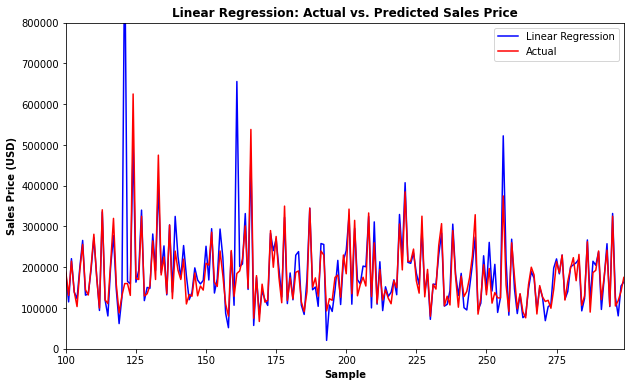

In [26]:
range_plot = range(100,300)

fig, ax = plt.subplots(figsize=(10,6))
lr_1 = ax.plot(range_plot, lr_predictions[range_plot], color='blue', label='Linear Regression')
lr_2 = ax.plot(range_plot, y_test[range_plot], color='red', label = 'Actual')
ax.set_ylim(0, 800000)
ax.set_xlim(range_plot[0], range_plot[-1])
plt.title('Linear Regression: Actual vs. Predicted Sales Price', fontweight='bold')
plt.xlabel('Sample', fontweight='bold')
plt.ylabel('Sales Price (USD)', fontweight='bold')
plt.legend(handles=[lr_1[0],lr_2[0]])
plt.show()

fig.savefig('/home/greydon/Documents/GitHub/blog/docs/machine_learning/img/linear_regression_04.png')